In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

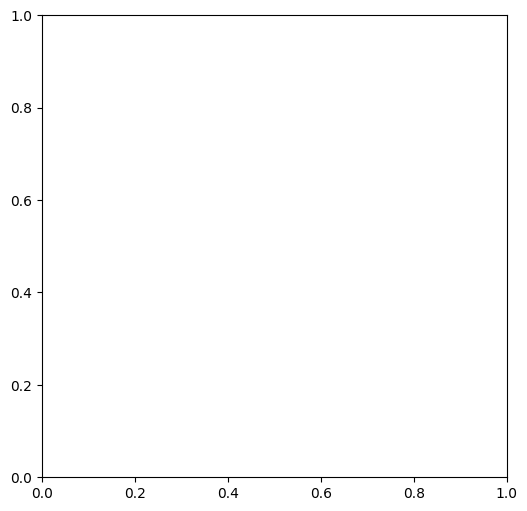

In [3]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define transducer positions
x_transducers = np.linspace(0.05, 0.45, 6)
y_transducers_top = np.full_like(x_transducers, 0.45)
y_transducers_bottom = np.full_like(x_transducers, 0.05)

In [4]:
x_transducers_full = np.concatenate([x_transducers, x_transducers])
y_transducers_full = np.concatenate([y_transducers_top, y_transducers_bottom])

# Add transducers as blue dots
ax.scatter(x_transducers_full, y_transducers_full, color='blue', label="Transducer")

In [5]:
# Label transducers
for i, (x, y) in enumerate(zip(x_transducers_full, y_transducers_full)):
    ax.text(x, y + 0.015, f"T$_{i+1}$", ha='center', fontsize=10)

# Draw the omega stringer (shaded region)
rect = patches.Rectangle((0, 0.25), 0.5, 0.1, linewidth=1, edgecolor='black', facecolor='gray', alpha=0.7)
ax.add_patch(rect)
ax.text(0.25, 0.3, "omega stringer", ha='center', fontsize=12, fontweight='bold')

Text(0.25, 0.3, 'omega stringer')

In [6]:
# Generate contour-like damage representation
def draw_damage(ax, x, y, label):
    X, Y = np.meshgrid(np.linspace(-0.02, 0.02, 100), np.linspace(-0.02, 0.02, 100))
    Z = np.exp(-((X / 0.01)**2 + (Y / 0.01)**2))
    ax.contour(x + X, y + Y, Z, levels=5, cmap='rainbow')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12, fontweight='bold')

In [7]:
# Damage locations
draw_damage(ax, 0.15, 0.35, "D1")
draw_damage(ax, 0.1, 0.1, "D2")
draw_damage(ax, 0.3, 0.1, "D3")

# Labels and legend
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)

# Legend
legend_elements = [patches.Patch(facecolor='gray', edgecolor='black', label="Stringer"),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label="Transducer")]
ax.legend(handles=legend_elements, loc="upper left")

plt.show()


In [8]:
plt.show()

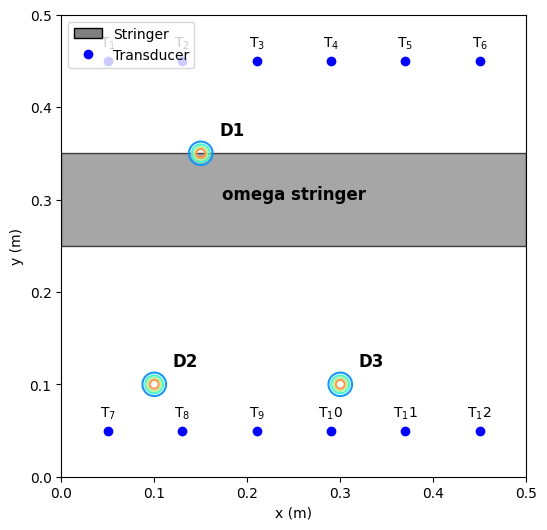

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define transducer positions
x_transducers = np.linspace(0.05, 0.45, 6)
y_transducers_top = np.full_like(x_transducers, 0.45)
y_transducers_bottom = np.full_like(x_transducers, 0.05)

x_transducers_full = np.concatenate([x_transducers, x_transducers])
y_transducers_full = np.concatenate([y_transducers_top, y_transducers_bottom])

# Add transducers as blue dots
ax.scatter(x_transducers_full, y_transducers_full, color='blue', label="Transducer")

# Label transducers
for i, (x, y) in enumerate(zip(x_transducers_full, y_transducers_full)):
    ax.text(x, y + 0.015, f"T$_{i+1}$", ha='center', fontsize=10)

# Draw the omega stringer (shaded region)
rect = patches.Rectangle((0, 0.25), 0.5, 0.1, linewidth=1, edgecolor='black', facecolor='gray', alpha=0.7)
ax.add_patch(rect)
ax.text(0.25, 0.3, "omega stringer", ha='center', fontsize=12, fontweight='bold')

# Generate contour-like damage representation
def draw_damage(ax, x, y, label):
    X, Y = np.meshgrid(np.linspace(-0.02, 0.02, 100), np.linspace(-0.02, 0.02, 100))
    Z = np.exp(-((X / 0.01)**2 + (Y / 0.01)**2))
    ax.contour(x + X, y + Y, Z, levels=5, cmap='rainbow')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12, fontweight='bold')

# Damage locations
draw_damage(ax, 0.15, 0.35, "D1")
draw_damage(ax, 0.1, 0.1, "D2")
draw_damage(ax, 0.3, 0.1, "D3")

# Labels and legend
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)

# Legend
legend_elements = [patches.Patch(facecolor='gray', edgecolor='black', label="Stringer"),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label="Transducer")]
ax.legend(handles=legend_elements, loc="upper left")

plt.show()


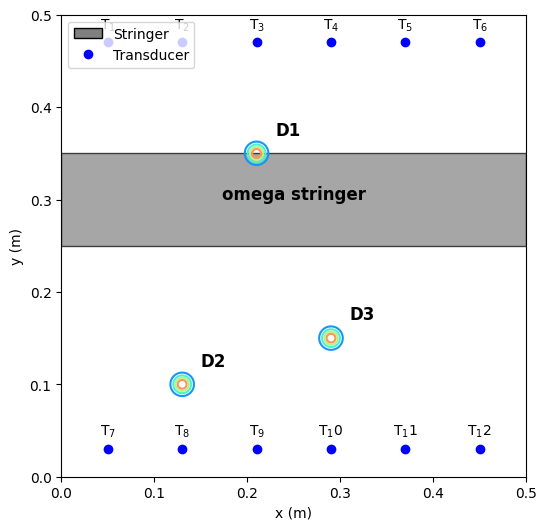

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert mm to meters
def mm_to_m(value):
    return value / 1000.0

# Transducer coordinates (converted to meters)
transducer_coords = np.array([
    [50, 470], [130, 470], [210, 470], [290, 470], [370, 470], [450, 470],
    [50, 30], [130, 30], [210, 30], [290, 30], [370, 30], [450, 30]
])
transducer_coords = mm_to_m(transducer_coords)

# Damage coordinates (converted to meters)
damage_coords = np.array([
    [210, 350],  # D1
    [130, 100],  # D2
    [290, 150]   # D3
])
damage_coords = mm_to_m(damage_coords)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot transducers as blue dots
ax.scatter(transducer_coords[:, 0], transducer_coords[:, 1], color='blue', label="Transducer")

# Label transducers
for i, (x, y) in enumerate(transducer_coords):
    ax.text(x, y + 0.015, f"T$_{i+1}$", ha='center', fontsize=10)

# Draw the omega stringer (shaded region)
stringer_ymin = mm_to_m(250)
stringer_ymax = mm_to_m(350)
rect = patches.Rectangle((0, stringer_ymin), 0.5, stringer_ymax - stringer_ymin,
                         linewidth=1, edgecolor='black', facecolor='gray', alpha=0.7)
ax.add_patch(rect)
ax.text(0.25, mm_to_m(300), "omega stringer", ha='center', fontsize=12, fontweight='bold')

# Generate contour-like damage representation
def draw_damage(ax, x, y, label):
    X, Y = np.meshgrid(np.linspace(-0.02, 0.02, 100), np.linspace(-0.02, 0.02, 100))
    Z = np.exp(-((X / 0.01)**2 + (Y / 0.01)**2))
    ax.contour(x + X, y + Y, Z, levels=5, cmap='rainbow')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12, fontweight='bold')

# Draw damages
draw_damage(ax, *damage_coords[0], "D1")
draw_damage(ax, *damage_coords[1], "D2")
draw_damage(ax, *damage_coords[2], "D3")

# Labels and legend
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)

# Legend
legend_elements = [patches.Patch(facecolor='gray', edgecolor='black', label="Stringer"),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label="Transducer")]
ax.legend(handles=legend_elements, loc="upper left")

plt.show()


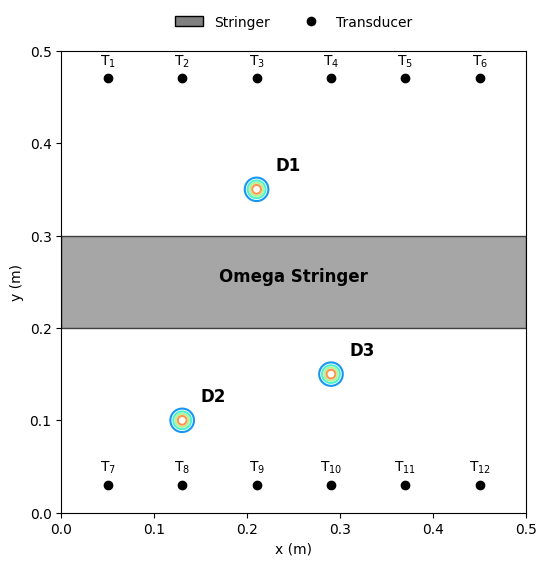

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert mm to meters
def mm_to_m(value):
    return value / 1000.0

# Transducer coordinates (converted to meters)
transducer_coords = np.array([
    [50, 470], [130, 470], [210, 470], [290, 470], [370, 470], [450, 470],
    [50, 30], [130, 30], [210, 30], [290, 30], [370, 30], [450, 30]
])
transducer_coords = mm_to_m(transducer_coords)

# Damage coordinates (converted to meters)
damage_coords = np.array([
    [210, 350],  # D1
    [130, 100],  # D2
    [290, 150]   # D3
])
damage_coords = mm_to_m(damage_coords)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot transducers as blue dots
ax.scatter(transducer_coords[:, 0], transducer_coords[:, 1], color='black', label="Transducer")

# Label transducers
for i, (x, y) in enumerate(transducer_coords):
    ax.text(x, y + 0.015, f"T$_{{{i+1}}}$", ha='center', fontsize=10)


# Draw the omega stringer (shaded region from 0.2m to 0.3m)
stringer_ymin = 0.2
stringer_ymax = 0.3
rect = patches.Rectangle((0, stringer_ymin), 0.5, stringer_ymax - stringer_ymin,
                         linewidth=1, edgecolor='black', facecolor='gray', alpha=0.7)
ax.add_patch(rect)
ax.text(0.25, 0.25, "Omega Stringer", ha='center', fontsize=12, fontweight='bold')

# Generate contour-like damage representation
def draw_damage(ax, x, y, label):
    X, Y = np.meshgrid(np.linspace(-0.02, 0.02, 100), np.linspace(-0.02, 0.02, 100))
    Z = np.exp(-((X / 0.01)**2 + (Y / 0.01)**2))
    ax.contour(x + X, y + Y, Z, levels=5, cmap='rainbow')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12, fontweight='bold')

# Draw damages
draw_damage(ax, *damage_coords[0], "D1")
draw_damage(ax, *damage_coords[1], "D2")
draw_damage(ax, *damage_coords[2], "D3")

# Labels and legend
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)

# Legend
legend_elements = [patches.Patch(facecolor='gray', edgecolor='black', label="Stringer"),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label="Transducer")]
ax.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2, frameon=False)


plt.show()


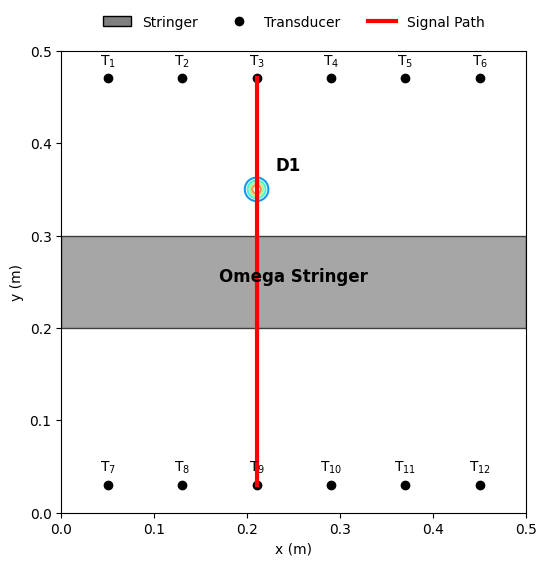

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert mm to meters
def mm_to_m(value):
    return value / 1000.0

# Transducer coordinates (converted to meters)
transducer_coords = np.array([
    [50, 470], [130, 470], [210, 470], [290, 470], [370, 470], [450, 470],
    [50, 30], [130, 30], [210, 30], [290, 30], [370, 30], [450, 30]
])
transducer_coords = mm_to_m(transducer_coords)

# Damage coordinates (only D1 remains)
damage_coords = mm_to_m(np.array([[210, 350]]))  # D1 only

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot transducers as blue dots
ax.scatter(transducer_coords[:, 0], transducer_coords[:, 1], color='black', label="Transducer")

# Label transducers
for i, (x, y) in enumerate(transducer_coords):
    ax.text(x, y + 0.015, f"T$_{{{i+1}}}$", ha='center', fontsize=10)

# Draw the omega stringer (shaded region from 0.2m to 0.3m)
stringer_ymin = 0.2
stringer_ymax = 0.3
rect = patches.Rectangle((0, stringer_ymin), 0.5, stringer_ymax - stringer_ymin,
                         linewidth=1, edgecolor='black', facecolor='gray', alpha=0.7)
ax.add_patch(rect)
ax.text(0.25, 0.25, "Omega Stringer", ha='center', fontsize=12, fontweight='bold')

# Generate contour-like damage representation (D1 only)
def draw_damage(ax, x, y, label):
    X, Y = np.meshgrid(np.linspace(-0.02, 0.02, 100), np.linspace(-0.02, 0.02, 100))
    Z = np.exp(-((X / 0.01)**2 + (Y / 0.01)**2))
    ax.contour(x + X, y + Y, Z, levels=5, cmap='rainbow')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12, fontweight='bold')

# Draw damage (only D1)
draw_damage(ax, *damage_coords[0], "D1")

# Draw the red bold line from T3 to T9
T3_x, T3_y = transducer_coords[2]  # T3 (210, 470 mm)
T9_x, T9_y = transducer_coords[8]  # T9 (210, 30 mm)
ax.plot([T3_x, T9_x], [T3_y, T9_y], 'r-', linewidth=3, label="Signal Path")

# Labels and legend
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)

# Legend (moved above the figure)
legend_elements = [patches.Patch(facecolor='gray', edgecolor='black', label="Stringer"),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label="Transducer"),
                   plt.Line2D([0], [0], color='red', linewidth=3, label="Signal Path")]
ax.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=3, frameon=False)

plt.show()
